In [1]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from matplotlib import pyplot as plt
import numpy as np

Ready reading maze file ../data/toy_maze.txt
Made EGreedy


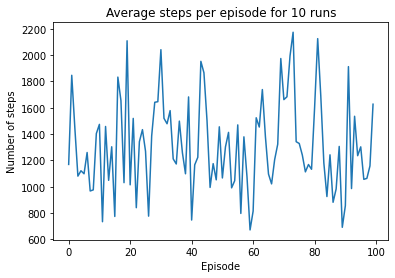

In [2]:
# Load the maze
file = "../data/toy_maze.txt"
# file = "../data/easy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
maze.set_reward(maze.get_state(9, 9), 10)
#maze.set_reward(maze.get_state(24, 14), 10)

# Create a robot at starting and reset location (0,0) (top left)
robot = Agent(0, 0)

# Make a selection object (you need to implement the methods in this class)
selection = MyEGreedy()

# Make a Qlearning object (you need to implement the methods in this class)
learn = MyQLearning()

stop = False

# keep learning until you decide to stop
learn = MyQLearning()
steps_array = []
num_of_runs = 10
num_of_episodes = 100
iterations = 30000
stop = False

for r in range(num_of_runs):
    learn = MyQLearning()
    robot = Agent(0, 0)
    steps_array.append([])
    epsilon = 1 # 0.1 normally with learning
    for episode in range(num_of_episodes):
        condition = iterations
        stop = False
        #print("Run: " + str(r) + " Episode: " + str(episode))
        while not stop and condition > 0:
            condition -= 1
            new_action = selection.get_egreedy_action(robot, maze, learn, epsilon)
            current_state = robot.get_state(maze)
            new_state = robot.do_action(new_action, maze)
            reward = maze.get_reward(new_state)
            possible_actions = maze.get_valid_actions(robot)
            # learn.update_q(current_state, new_action, reward, new_state, possible_actions, alpha, gamma)
            #if robot.get_state(maze).__eq__(maze.get_state(24, 14)):
            if robot.get_state(maze).__eq__(maze.get_state(9, 9)):
                stop = True
        steps_array[r].append(robot.nr_of_actions_since_reset)
        #end_states.append(robot.get_state(maze))
        robot.reset()
        # epsilon = epsilon * 0.999
#print(end_states[-1])
average_episode_array = np.zeros(num_of_episodes)
#print(steps_array)
for r in range(num_of_runs):
    for ep in range(num_of_episodes):
        average_episode_array[ep] += steps_array[r][ep] / num_of_runs

plt.plot(average_episode_array)
plt.title("Average steps per episode for 10 runs")
plt.xlabel("Episode")
plt.ylabel("Number of steps")
plt.show()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy


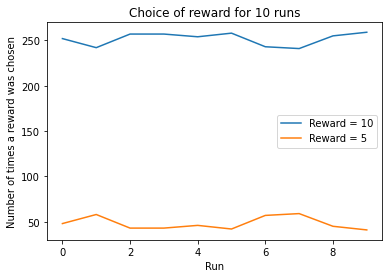

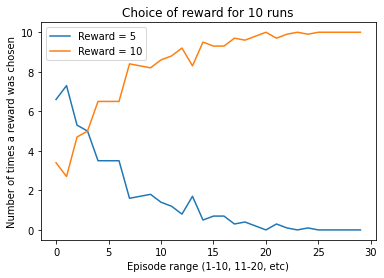

In [3]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
maze.set_reward(maze.get_state(9, 9), 10)
maze.set_reward(maze.get_state(9,0), 5)

# Create a robot at starting and reset location (0,0) (top left)
robot = Agent(0, 0)

# Make a selection object (you need to implement the methods in this class)
selection = MyEGreedy()

# Make a Qlearning object (you need to implement the methods in this class)
learn = MyQLearning()

stop = False

# keep learning until you decide to stop
learn = MyQLearning()
steps_array = []
num_of_runs = 10
num_of_episodes = 300
iterations = 30000
stop = False
alpha = 0.7
gamma = 0.9
epsilon = 1
epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]
epsilon_averages = []
alphas = epsilons
alpha_averages = []
reward_choice_array_10 = np.zeros(num_of_runs)
reward_choice_array_5 = np.zeros(num_of_runs)
end_states = []
#for eps in epsilons:
#for alph in alphas:
#    alpha = alph
    #epsilon = eps
#    steps_array = []
grouped_by_episode_5 = np.zeros(int(np.floor(num_of_episodes/10)))
grouped_by_episode_10 = np.zeros(int(np.floor(num_of_episodes/10)))

for r in range(num_of_runs):
    learn = MyQLearning()
    robot = Agent(0, 0)
    steps_array.append([])
    epsilon = 1
    for episode in range(num_of_episodes):
        condition = iterations
        stop = False
        #print("Run: " + str(r) + " Episode: " + str(episode))
        while not stop and condition > 0:
            condition -= 1
            new_action = selection.get_egreedy_action(robot, maze, learn,
                ((num_of_episodes - episode) / num_of_episodes) * epsilon)
            current_state = robot.get_state(maze)
            new_state = robot.do_action(new_action, maze)
            reward = maze.get_reward(new_state)
            possible_actions = maze.get_valid_actions(robot)
            learn.update_q(current_state, new_action, reward, new_state, possible_actions, alpha, gamma)
            #if robot.get_state(maze).__eq__(maze.get_state(24, 14)):
            if robot.get_state(maze).__eq__(maze.get_state(9, 9)):
                reward_choice_array_10[r] += 1
                grouped_by_episode_10[int(np.floor(episode/10))] += 1/num_of_runs
                stop = True
            if robot.get_state(maze).__eq__(maze.get_state(9, 0)):
                reward_choice_array_5[r] += 1
                grouped_by_episode_5[int(np.floor(episode / 10))] += 1 / num_of_runs
                stop = True
        steps_array[r].append(robot.nr_of_actions_since_reset)
        #end_states.append(robot.get_state(maze))
        robot.reset()
        # epsilon = epsilon * 0.999
#print(end_states[-1])
average_episode_array = np.zeros(num_of_episodes)
#print(steps_array)
for r in range(num_of_runs):
    for ep in range(num_of_episodes):
        average_episode_array[ep] += steps_array[r][ep] / num_of_runs
        
plt.plot(reward_choice_array_10, label="Reward = 10")
plt.plot(reward_choice_array_5, label="Reward = 5")
plt.title("Choice of reward for 10 runs")
plt.xlabel("Run")
plt.ylabel("Number of times a reward was chosen")
plt.legend()
plt.show()

plt.plot(grouped_by_episode_5, label="Reward = 5")
plt.plot(grouped_by_episode_10, label="Reward = 10")
plt.title("Choice of reward for 10 runs")
plt.xlabel("Episode range (1-10, 11-20, etc)")
plt.ylabel("Number of times a reward was chosen")
plt.legend()
plt.show()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
choice for gamma= 0.1 is 91.39999999999908
choice for gamma= 0.2 is 91.1999999999991
choice for gamma= 0.3 is 89.79999999999917
choice for gamma= 0.4 is 89.69999999999918
choice for gamma= 0.5 is 91.1999999999991
choice for gamma= 0.6 is 81.29999999999966
choice for gamma= 0.7 is 84.49999999999947
choice for gamma= 0.8 is 36.200000000000244
choice for gamma= 0.9 is 37.700000000000266


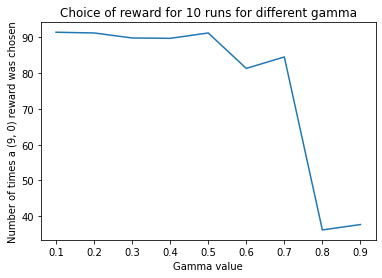

In [4]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
maze.set_reward(maze.get_state(9, 9), 10)
maze.set_reward(maze.get_state(9,0), 5)

# Create a robot at starting and reset location (0,0) (top left)
robot = Agent(0, 0)

# Make a selection object (you need to implement the methods in this class)
selection = MyEGreedy()

# Make a Qlearning object (you need to implement the methods in this class)
learn = MyQLearning()

stop = False

# keep learning until you decide to stop
learn = MyQLearning()
steps_array = []
num_of_runs = 10
num_of_episodes = 100
iterations = 30000
stop = False
alpha = 0.7
gamma = 0.9
epsilon = 1
epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]
epsilon_averages = []
alphas = epsilons
gammas = [n/10 for n in range(1,10,1)]
alpha_averages = []
end_states = []
gamma_finishes = []
#for eps in epsilons:
#for alph in alphas:
#    alpha = alph
    #epsilon = eps
#    steps_array = []
for gam in gammas:
    gamma = gam
    reward_choice_5 = 0
    for r in range(num_of_runs):
        learn = MyQLearning()
        robot = Agent(0, 0)
        steps_array.append([])
        epsilon = 1
        for episode in range(num_of_episodes):
            condition = iterations
            stop = False
            #print("Run: " + str(r) + " Episode: " + str(episode))
            while not stop and condition > 0:
                condition -= 1
                new_action = selection.get_egreedy_action(robot, maze, learn,
                    ((num_of_episodes - episode) / num_of_episodes) * epsilon)
                current_state = robot.get_state(maze)
                new_state = robot.do_action(new_action, maze)
                reward = maze.get_reward(new_state)
                possible_actions = maze.get_valid_actions(robot)
                learn.update_q(current_state, new_action, reward, new_state, possible_actions, alpha, gamma)
                #if robot.get_state(maze).__eq__(maze.get_state(24, 14)):
                if robot.get_state(maze).__eq__(maze.get_state(9, 9)):
                    stop = True
                if robot.get_state(maze).__eq__(maze.get_state(9, 0)):
                    reward_choice_5 += 1 / num_of_runs
                    stop = True
            steps_array[r].append(robot.nr_of_actions_since_reset)
            #end_states.append(robot.get_state(maze))
            robot.reset()
    print("choice for gamma= " + str(gam) + " is " + str(reward_choice_5))        
    gamma_finishes.append(reward_choice_5)
      

plt.plot(gammas, gamma_finishes)
plt.title("Choice of reward for 10 runs for different gamma")
plt.xlabel("Gamma value")
plt.ylabel("Number of times a (9, 0) reward was chosen")
plt.xticks(gammas)
plt.show()